<a href="https://colab.research.google.com/github/sankadesh/tensorflow-image-classifier-prototype/blob/main/notebooks/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opendatasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/datasets/jakupymeraj/cats-and-dogs-image-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sankadassanayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jakupymeraj/cats-and-dogs-image-dataset


100%|██████████| 217M/217M [00:00<00:00, 966MB/s] 


In [5]:
Batch_size = 32
Image_size = (128,128)

In [6]:
train_data_dir = '/content/cats-and-dogs-image-dataset/dataset/training_set'
test_data_dir = '/content/cats-and-dogs-image-dataset/dataset/test_set'

In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=Batch_size,
    image_size=Image_size,
    subset='training',
    validation_split=0.1,
    seed=42

)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=Batch_size,
    image_size=Image_size,
    subset='validation',
    validation_split=0.1,
    seed=42

)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=Batch_size,
    image_size=Image_size
)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


Verify data divided correctly or not

In [8]:
train_data.class_names

['cats', 'dogs']

In [9]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


plot some images

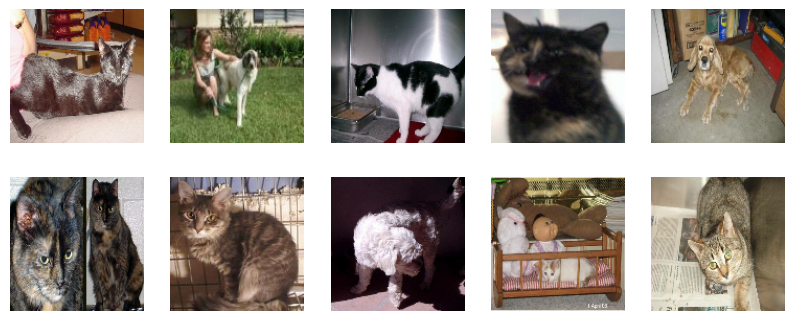

In [10]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    #plt.title(class_names[label[i]])
    plt.axis('off')

**Feature scaling**

In [11]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

here we can see that our image data in rgb values (0,255) range , we change this data range to (0,1) -normalize

In [12]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [12]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

Data augmentation - here we generate more image layer to add more data when model is training

In [13]:
data_augmentation = tf.keras.Sequential(
    [
     tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),

    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Model Building**

In [14]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
     train_data,
     epochs=20,
     validation_data=validation_data
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.5731 - loss: 0.6915 - val_accuracy: 0.5163 - val_loss: 0.6912
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6377 - loss: 0.6366 - val_accuracy: 0.6963 - val_loss: 0.6323
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6420 - loss: 0.6246 - val_accuracy: 0.6850 - val_loss: 0.5846
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6592 - loss: 0.6071 - val_accuracy: 0.6388 - val_loss: 0.6352
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.6836 - loss: 0.5812 - val_accuracy: 0.6837 - val_loss: 0.5858
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7008 - loss: 0.5661 - val_accuracy: 0.7563 - val_loss: 0.5243
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6960 - loss: 0.5632 - val_accuracy: 0.6712 - val_loss: 0.6302
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7172 - loss: 0.5535 - val_ac

Model Validation

In [18]:
history.history

{'accuracy': [0.5934722423553467,
  0.6438888907432556,
  0.6524999737739563,
  0.6729166507720947,
  0.6898611187934875,
  0.7012500166893005,
  0.7045833468437195,
  0.7190277576446533,
  0.7404166460037231,
  0.7430555820465088,
  0.7548611164093018,
  0.7644444704055786,
  0.772777795791626,
  0.7629166841506958,
  0.773194432258606,
  0.7829166650772095,
  0.7847222089767456,
  0.7984722256660461,
  0.7911111116409302,
  0.8029166460037231],
 'loss': [0.6675452589988708,
  0.6295205354690552,
  0.6189018487930298,
  0.5971137881278992,
  0.5798344612121582,
  0.5664369463920593,
  0.5560341477394104,
  0.5502862334251404,
  0.52240389585495,
  0.5131930112838745,
  0.5019022226333618,
  0.4888618290424347,
  0.4738546311855316,
  0.4776439964771271,
  0.4711930453777313,
  0.4556969404220581,
  0.44828861951828003,
  0.43406248092651367,
  0.4288991689682007,
  0.420137882232666],
 'val_accuracy': [0.5162500143051147,
  0.6962500214576721,
  0.6850000023841858,
  0.638750016689300

Visualize these values as a plot

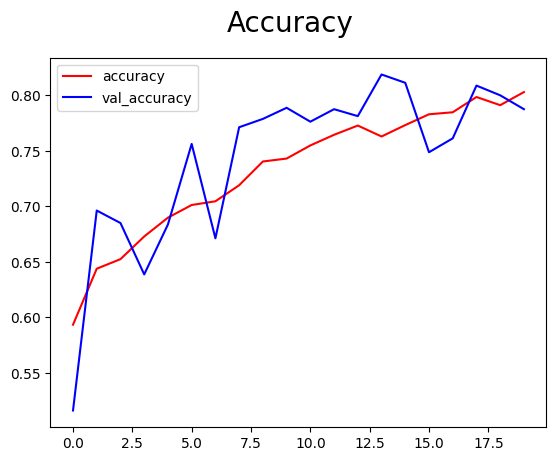

In [20]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='red',label='accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

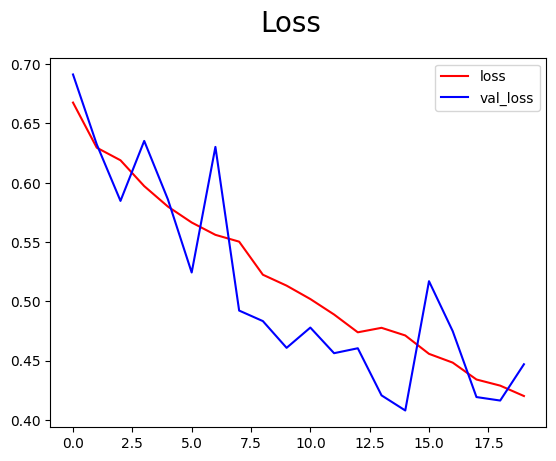

In [23]:
fig = plt.figure()
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

Model evaluation

In [24]:
precision =tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [26]:
for batch in test_data.as_numpy_iterator():
  x,y=batch
  yhat = model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

In [27]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8923705816268921>

In [28]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6549999713897705>

In [29]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7879999876022339>

Model saving and use further use

In [30]:
pip install opencv.python

In [31]:
import cv2

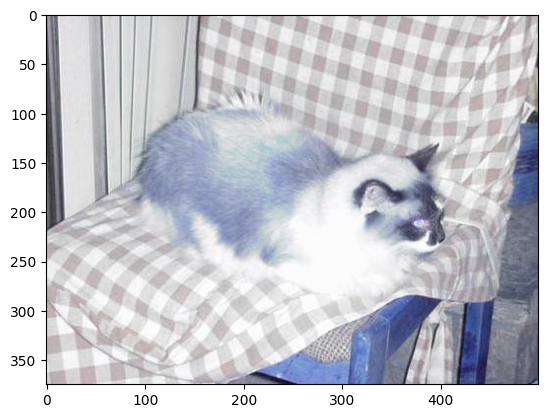

In [35]:
image =cv2.imread('/content/cats-and-dogs-image-dataset/dataset/test_set/cats/cat.4011.jpg')
plt.imshow(image)
plt.show()

In [36]:
resized_image = tf.image.resize(image,Image_size)
scaled_image= resized_image/255

In [37]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.612159  , 0.60007197, 0.6212137 ],
        [0.41646406, 0.4268654 , 0.46096468],
        [0.40621823, 0.4268524 , 0.44646025],
        ...,
        [0.6632671 , 0.6299031 , 0.6416678 ],
        [0.672256  , 0.6147479 , 0.63043416],
        [0.7216599 , 0.7028486 , 0.71245337]],

       [[0.6048575 , 0.5926945 , 0.614064  ],
        [0.42005453, 0.4281675 , 0.46684355],
        [0.37757352, 0.39820772, 0.42372856],
        ...,
        [0.6298669 , 0.6024159 , 0.6141806 ],
        [0.7335384 , 0.67863643, 0.6943227 ],
        [0.73967326, 0.72438526, 0.7322284 ]],

       [[0.60885304, 0.5949284 , 0.62374276],
        [0.41535267, 0.4231958 , 0.46377486],
        [0.38593295, 0.40316528, 0.43645492],
        ...,
        [0.6147235 , 0.58727247, 0.59903723],
        [0.7652934 , 0.72215617, 0.7339209 ],
        [0.7563726 , 0.7410846 , 0.7489277 ]],

       ...,

       [[0.82919073, 0.83144253, 0.83282125],
        [0.70

But here no batch soze mentioned in image , so we have to increase dimentions from 128,128,3 >> 1,128,128,3

In [38]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [39]:
y_hat = model.predict(np.expand_dims(scaled_image,0))
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


array([[0.09432837]], dtype=float32)

In [40]:
if y_hat > 0.5:
  print('Dog')
else:
  print('Cat')

Cat


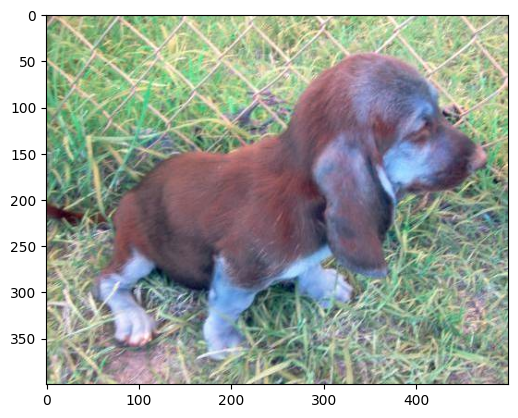

In [43]:
image2 =cv2.imread('/content/cats-and-dogs-image-dataset/dataset/test_set/dogs/dog.4009.jpg')
plt.imshow(image2)
plt.show()

In [44]:
resized_image2 = tf.image.resize(image2,Image_size)
scaled_image2= resized_image2/255

In [45]:
y_hat2 = model.predict(np.expand_dims(scaled_image2,0))
y_hat2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9938019]], dtype=float32)

In [46]:
if y_hat2 > 0.5:
  print('Dog')
else:
  print('Cat')

Dog
